In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("household_power_consumption.txt", sep=";" )
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [ ]:
df["Time"] = pd.to_datetime(df[ "Time" ]) #convert column to datetime
df.set_index( "Time" , inplace= True )
#df= df.reset_index().set_index('timestamps')
df= df.resample('D').sum()

In [ ]:
mean_value=df.mean()
df=df.fillna(value=mean_value, inplace=True)

In [3]:
df["Date"] = pd.to_datetime(df[ "Date" ]) #convert column to datetime
df.set_index( "Date" , inplace= True )

NameError: name 'pd' is not defined

TypeError: 'value' must be an instance of str or bytes, not a float

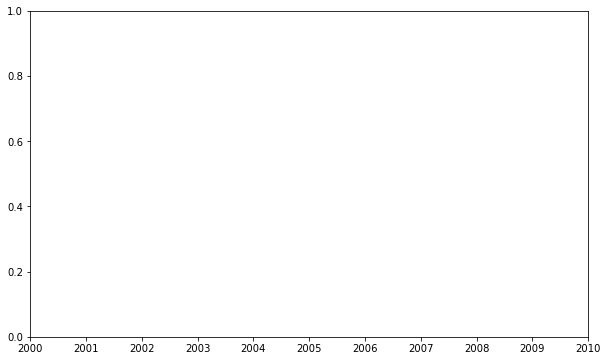

In [19]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.Voltage, '--' , marker= '*' , )

In [23]:
!pip install fbprophet
from fbprophet import Prophet
model = Prophet()
model.fit(df)
#predict for the next 10 months
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show() 

ERROR: Could not find a version that satisfies the requirement httpstan<4.7,>=4.6 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1)
ERROR: No matching distribution found for httpstan<4.7,>=4.6 (from pystan>=2.14->fbprophet)


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.3.2-py3-none-any.whl (47 kB)
  Using cached holidays-0.11.3.1-py3-none-any.whl (155 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)


ModuleNotFoundError: No module named 'fbprophet'